# Tarea: Solución de problemas de valor inicial

**Contenido**
1. Lineal $\dot{x} = ax$
2. nolineal $\dot{x} = sin(x)$
3. Circuito RC transladado (lineal) $\dot{x} = \frac{1}{RC}x$
4. Ecuación logística  $\dot{x} = Rx(1- \frac{x}{K})$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
def euler(dx,xo,ti,tf):
    h =0.001
    t = np.arange(ti,tf,h)
    x = np.zeros(len(t))
    x[0]=xo
    for i in range(1,len(t)):
        x[i]= x[i-1] + h*dx(t[i-1],x[i-1])
        
    return t,x

def kutta(dx,xo,ti,tf):
    h = 0.001 
    t = np.arange(ti,tf,h)
    x = np.zeros(len(t))
    x[0] = xo
    
    for i in range(1,len(t)):
        k_1 = dx(t[i-1],x[i-1])
        k_2 = dx(t[i-1] + (h/2),x[i-1]+(h/2)*k_1)
        k_3 = dx(t[i-1] + (h/2),x[i-1]+(h/2)*k_2)
        k_4 = dx(t[i-1] + h,x[i-1]+h*k_3)
        x[i] = x[i-1] + (h/6)*(k_1 + 2*k_2 + 2*k_3 + k_4)

    return t,x 

def flujos(iniciales,ti,tf,dx):
    y = np.zeros((len(iniciales),int((tf-ti)/0.001)))
    for i in range(len(iniciales)):
        t,y[i,:] = euler(dx,iniciales[i],ti,tf)
        plt.plot(t,y[i,:])
    plt.grid()
    plt.xlabel('t')
    plt.ylabel('x')

### Lineal $\dot{x} = ax$

In [3]:
fs = 1000
t = np.arange(-10,10,1/fs)
x = t 

In [4]:
def dx(t,x):
    a = 2
    return a*x 

In [5]:
d_x = dx(t,x)

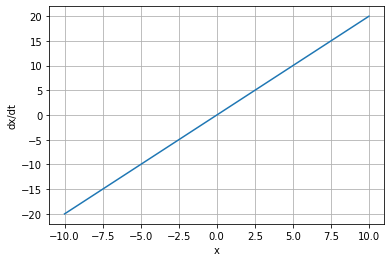

In [6]:
plt.plot(t,d_x)
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.grid()

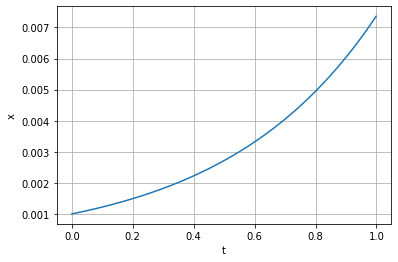

In [7]:
xo = 0.001
ti,tf = 0,1
t,x = euler(dx,xo,ti,tf)
plt.plot(t,x)
plt.xlabel("t")
plt.ylabel("x")
plt.grid()

### flujos

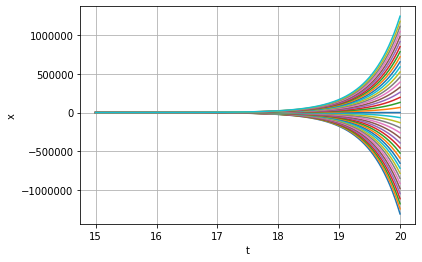

In [8]:
inciciales = np.arange(-60,60, 3)
flujos(inciciales,15,20,dx)

### No lineal $\dot{x} = sin(x)$

In [9]:
fs = 10000 
t = np.arange(0,10,1/fs)
x = t 
def dx(t,x):
    f = 1/(2*np.pi)
    return np.sin(x*2*np.pi*f)

In [10]:
d_x = dx(t,x)

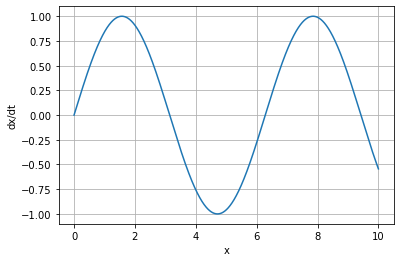

In [11]:
plt.plot(t,d_x)
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.grid()

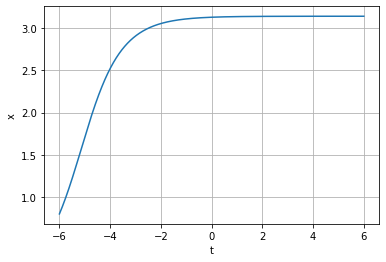

In [12]:
xo = 0.8
ti,tf = -6,6
t,x = euler(dx,xo,ti,tf)
plt.plot(t,x)
plt.xlabel("t")
plt.ylabel("x")
plt.grid()

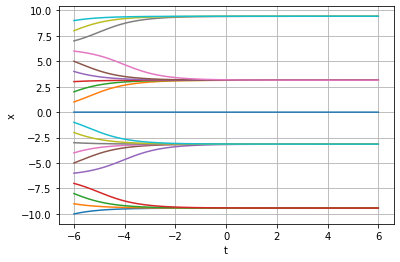

In [13]:
inciciales = np.arange(-10,10, 1)
flujos(inciciales,-6,6,dx)

## Circuito RC transladado (lineal) $\dot{x} = \frac{1}{RC}x$

In [14]:
fs = 10000 
t = np.arange(0,10,1/fs)
x = t 
def dx(t,x):
    R = 1000
    C = 0.0001
    return -x*(1/(R*C))

In [15]:
d_x = dx(t,x)

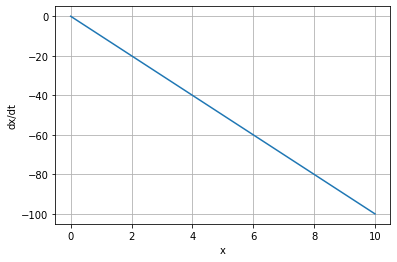

In [16]:
plt.plot(t,d_x)
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.grid()

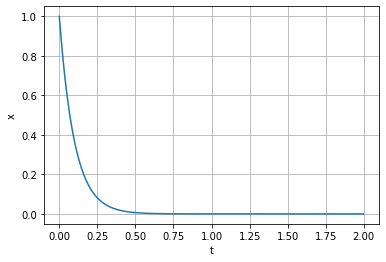

In [17]:
xo = 1
ti,tf = 0,2
t,x = euler(dx,xo,ti,tf)
plt.plot(t,x)
plt.xlabel("t")
plt.ylabel("x")
plt.grid()

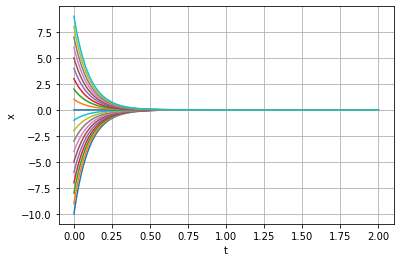

In [18]:
inciciales = np.arange(-10,10, 1)
flujos(inciciales,0,2,dx)

## Ecuación logística $\dot{x} = Rx(1- \frac{x}{K})$

In [19]:
fs = 10000 
t = np.arange(0,10,1/fs)
x = t 
def dx(t,x):
    R = 2
    K = 3
    return R*x*(1-x/K)

In [20]:
d_x = dx(t,x)

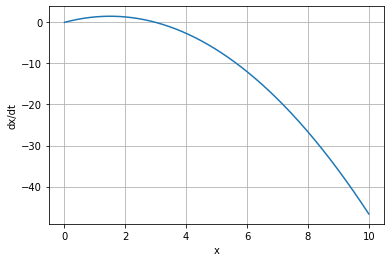

In [21]:
plt.plot(t,d_x)
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.grid()

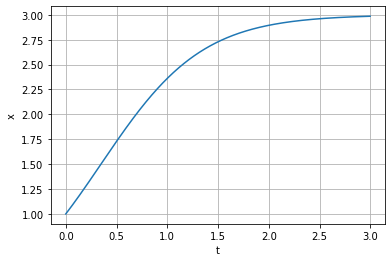

In [22]:
xo = 1
ti,tf = 0,3
t,x = euler(dx,xo,ti,tf)
plt.plot(t,x)
plt.xlabel("t")
plt.ylabel("x")
plt.grid()

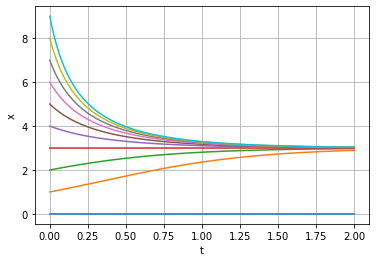

In [23]:
inciciales = np.arange(0,10, 1)
flujos(inciciales,0,2,dx)